In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S3/Office_Allyson-S3.csv",index_col='timestamp')

In [5]:
len(df)

6480

In [6]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [7]:
len(train_data),len(test_data)

(5760, 720)

In [8]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [9]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [10]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [11]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [12]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [13]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (478, 24)
y_train.shape =  (478, 12)
X_test.shape =  (58, 24)
y_test.shape =  (58, 12)


In [14]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [15]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(12, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 18)                450       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                228       
                                                                 
Total params: 1,278
Trainable params: 1,278
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 932.5773
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 684.6904
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 523.8698
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 435.4996
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 370.5753
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 322.8233
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 277.8955
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 233.1981
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 217.4419
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 192.5656
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 176.8654
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 171.5944
Epoch 13/300
4/4 [===================

In [17]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [19]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [20]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 4.823735440147356
Root Mean Squared Error for ANN Model for testing is: 3.6148137486867107
Mean Absolute Error for ANN Model for training is: 2.690653782175176
Mean Absolute Error for ANN Model for testing is: 2.179694148425398
MAPE for ANN Model for training is: 0.13684966065319282
MAPE for ANN Model for testing is: 0.12358620728872043


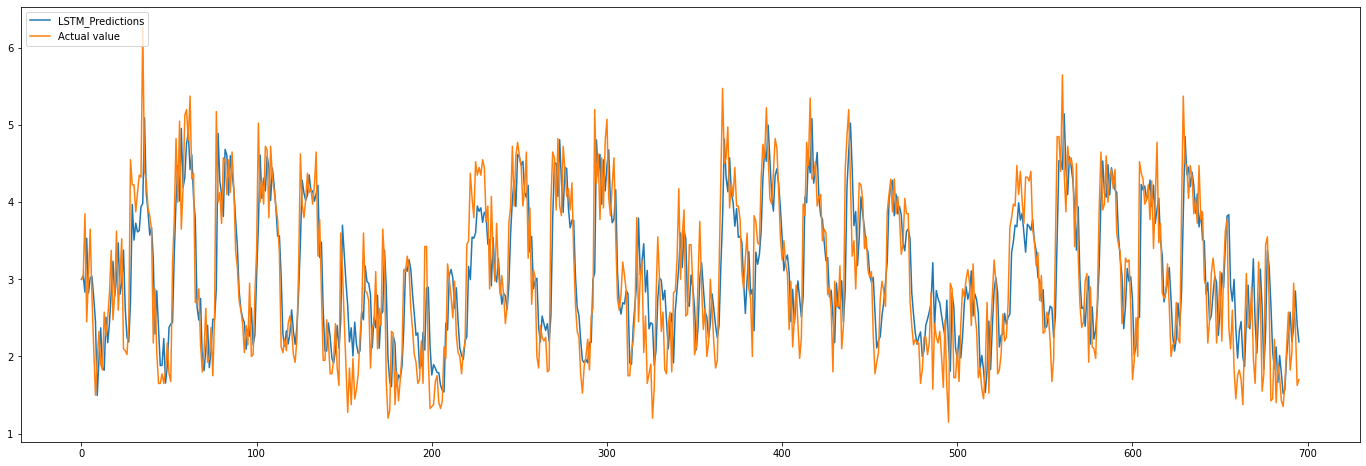

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.]), array([2.9996758], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.00032425]), array([-0.02179885]), array([1.01681113]), array([-1.0817709]), array([0.20321369]), array([0.63070035]), array([-0.26298285]), array([-0.66635251]), array([-0.95516109]), array([0.45625353]), array([0.36801505]), array([-0.47106516]), array([-0.02691495]), array([0.75308359]), array([-0.23317695]), array([0.321105]), array([0.38997173]), array([0.53974271]), array([-0.75840282]), array([0.04409409]), array([0.61408639]), array([-0.87370634]), array([0.21878433]), array([0.57306099]), array([-1.27860331]), array([-0.54080152]), array([-0.22270036]), array([0.23796701]), array([1.84656167]), array([0.25419569]), array([0.71661878]), array([0.14718342]), array([0.51076031]), array([0.71682549]), array([0.38396549]), array([2.29096222]), array([-0.69559145]), array([0.16611481]), array([0.04493332]), array([0.25232101]), array([-0.02541137]), array([-1.09220457]), array([0.58478665]), array([-0.80182171]), array([-0.70958948]), array([-0.23329663]), array([-0.1085284

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.29096222]), array([-1.6408155]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(367, 329)